In [5]:
import numpy as np
import matplotlib.pyplot as plt

def load_distributions(dict, node_num):
    distributions = list()
    for i in range(node_num):
        distributions.append(np.load(f'{dict}/r{i}-distributions.npy'))
    return distributions

In [6]:
def calculate_statistics(distributions):
    mean_probs = np.mean(distributions, axis=0)
    entropy = -np.sum(distributions * np.log2(distributions + 1e-9))
    return mean_probs, entropy

In [7]:
def calculate_statistics_for_all(dict, node_num):
    distributions = load_distributions(dict, node_num)
    num_epochs = distributions[0].shape[0]
    node_stats = {node_id: {'mean_probs': [], 'entropy': []} for node_id in range(node_num)}
    for node_id in range(node_num):
        for epoch_id in range(num_epochs):
            d_node_epoch = distributions[node_id][epoch_id]
            mean_probs, entropy = calculate_statistics(d_node_epoch)
            node_stats[node_id]['mean_probs'].append(mean_probs)
            node_stats[node_id]['entropy'].append(entropy)
    return node_stats


In [8]:
def plot_entropy_change(num_epochs, node_stats):
    plt.figure(figsize=(12, 6))
    for node_id, stats in node_stats.items():
        plt.plot(range(num_epochs), stats['entropy'], label=f'Node {node_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Entropy')
    plt.title('Entropy change')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution_heatmap(distributions, class_labels=None):
    if class_labels is None:
        class_labels = [str(i) for i in range(len(distributions[0]))]
    
    plt.figure(figsize=(14, 8))
    plt.imshow(distributions, aspect='auto', cmap='viridis')
    plt.colorbar(label='Probability', extend='both')
    plt.xticks(range(len(class_labels)), class_labels, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Sample Index')
    plt.title('Distributions')
    plt.show()


def plot_sample_distribution_bar(distributions, sample_indices=[0], class_labels=None):
    if class_labels is None:
        class_labels = [str(i) for i in range(distributions.shape[1])]
    
    num_samples = len(sample_indices)
    for idx, sample_index in enumerate(sample_indices):
        plt.figure(figsize=(14, 8))
        probs = distributions[sample_index]
        plt.bar(class_labels, probs)
        plt.xlabel('Class')
        plt.ylabel('Probability')
        plt.title(f'Distributions (Sample Index: {sample_index})')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

def plot_mean_prob_bar_in_one_epoch(node_stats, epoch_id, class_labels=None):
    num_nodes = len(node_stats)
    num_classes = len(next(iter(node_stats.values()))['mean_probs'][epoch_id])
    if class_labels is None:
        class_labels = [str(i) for i in range(num_classes)]
    
    fig, axes = plt.subplots(1, num_nodes, figsize=(num_nodes * 5, 5), sharey=True)
    for ax, (node_id, stats) in zip(axes, node_stats.items()):
        class_probs = stats['mean_probs'][epoch_id]
        ax.bar(class_labels, class_probs, color=plt.cm.Paired(np.arange(len(class_labels))))
        ax.set_title(f'Node {node_id} Mean Probabilities')
        ax.set_xlabel('Class')
        ax.set_ylabel('Mean Probability')
        ax.set_ylim(0, 1)
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()
        
def plot_mean_prob_over_epochs(node_stats, class_labels=None):
    num_nodes = len(node_stats)
    num_epochs = len(next(iter(node_stats.values()))['mean_probs'])
    num_classes = len(next(iter(node_stats.values()))['mean_probs'][0])
    if class_labels is None:
        class_labels = [str(i) for i in range(num_classes)]
    
    for node_id, stats in node_stats.items():
        plt.figure(figsize=(6, 3))
        for class_idx in range(num_classes):
            mean_probs = [epoch[class_idx] for epoch in stats['mean_probs']]
            plt.plot(range(num_epochs), mean_probs, label=f'Class {class_idx}')

        plt.title(f'Node {node_id} Mean Probabilities Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Probability')
        plt.legend()
        plt.grid(True)
        plt.show()

In [3]:
distributions = load_distributions('Output/swift-iid-8W-linear-shark-linear-2sgd-10epochs/', 8)


In [22]:
node0_distributions = distributions[0]

In [31]:
node0_distributions.shape

(10, 445, 10)

In [23]:
node0_distributions[0].shape

(445, 10)

In [17]:
node0_distributions.shape

(10, 445, 10)

In [30]:
node_stats = calculate_statistics_for_all('Output/swift-iid-8W-linear-shark-linear-2sgd-100epochs/', 8)

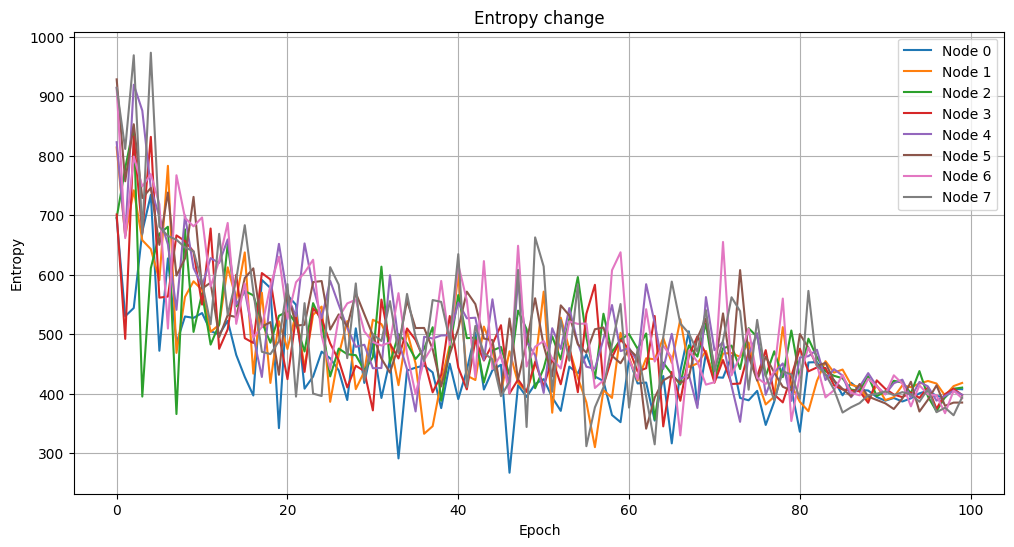

In [31]:
plot_entropy_change(100, node_stats)

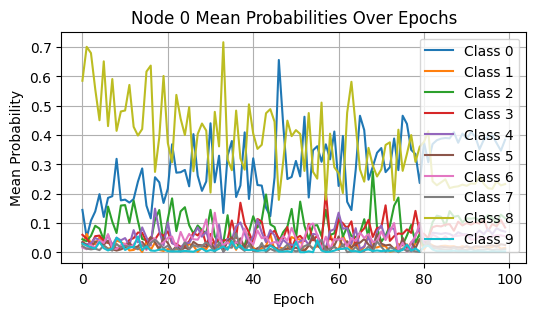

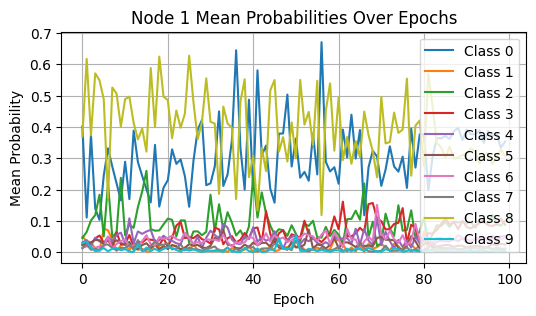

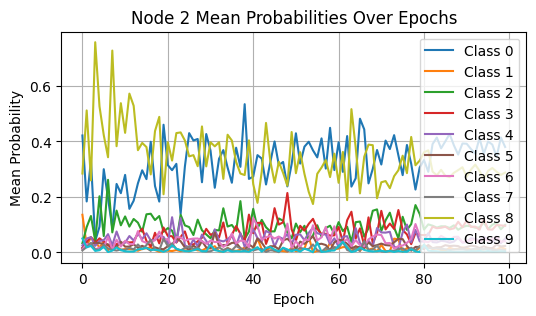

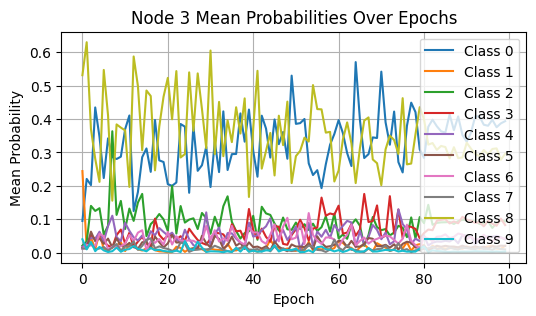

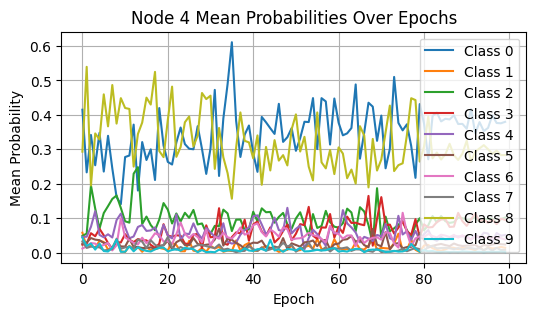

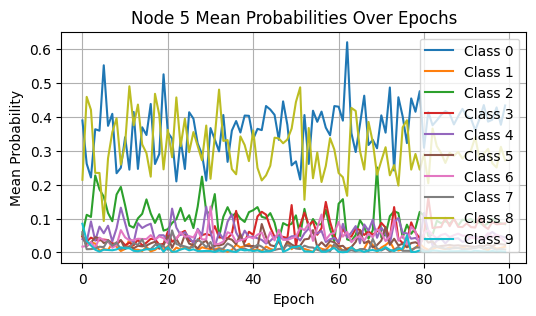

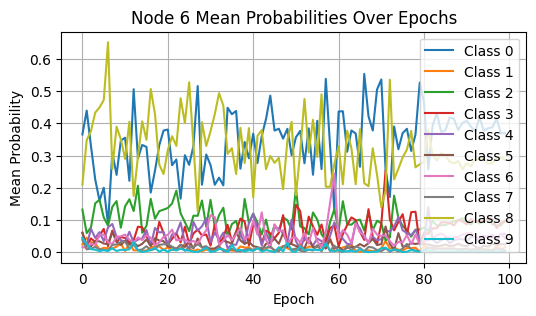

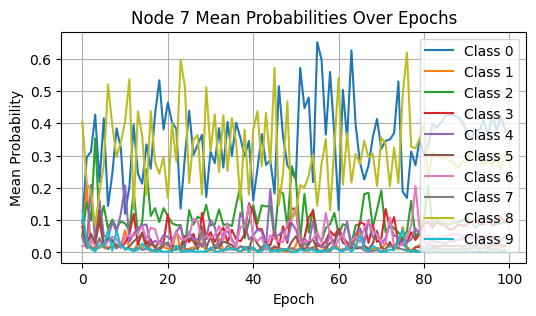

In [32]:
plot_mean_prob_over_epochs(node_stats)


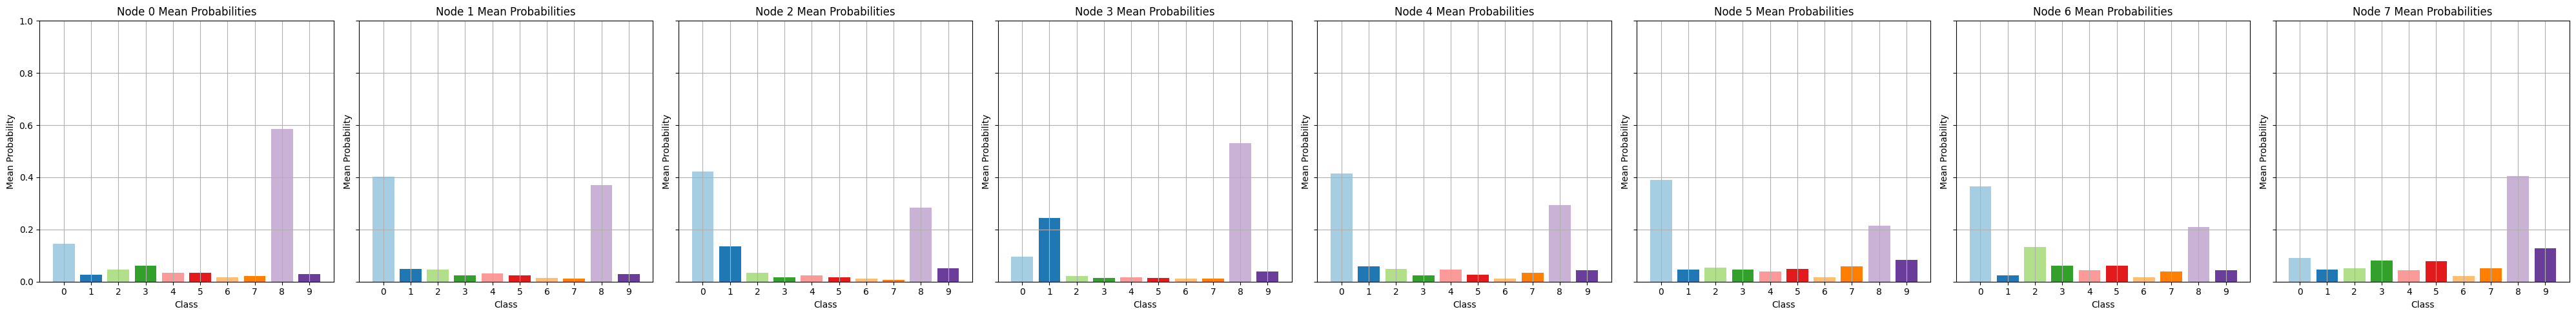

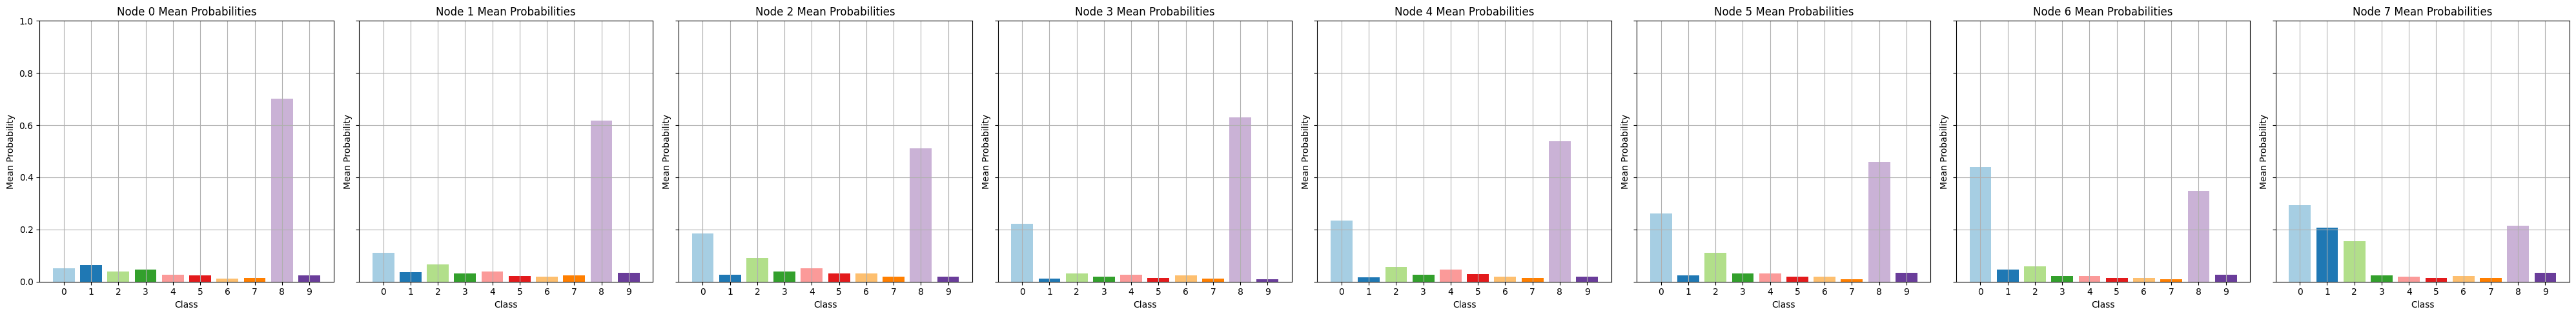

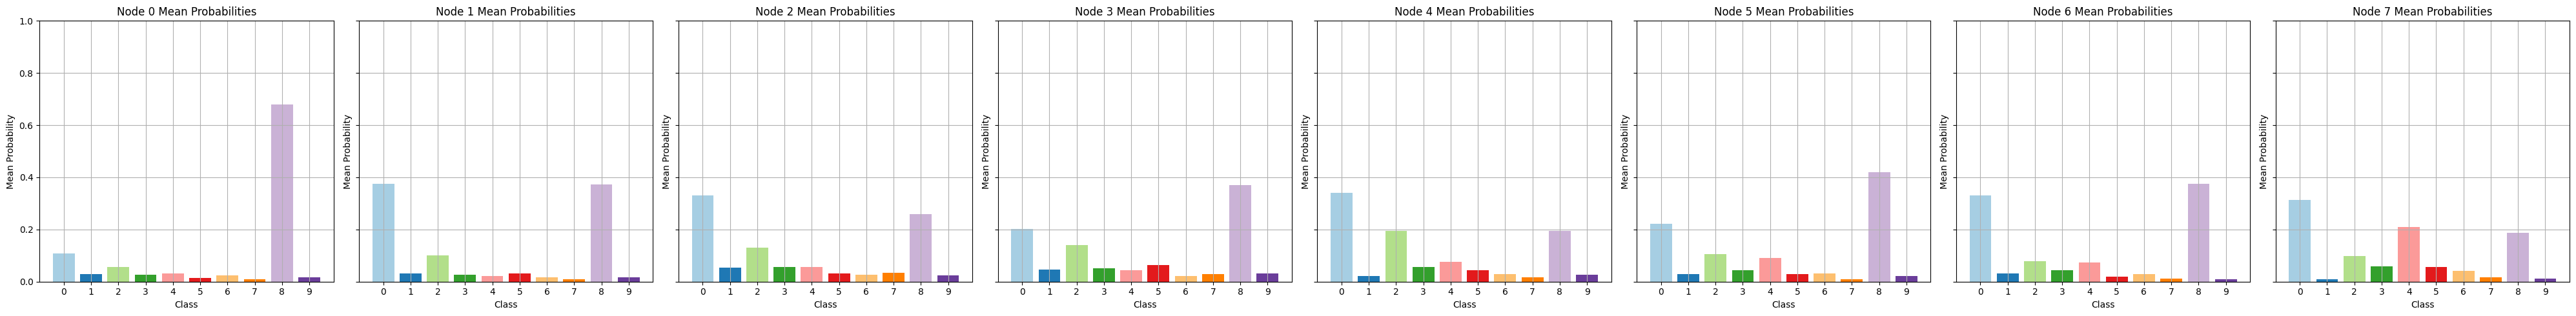

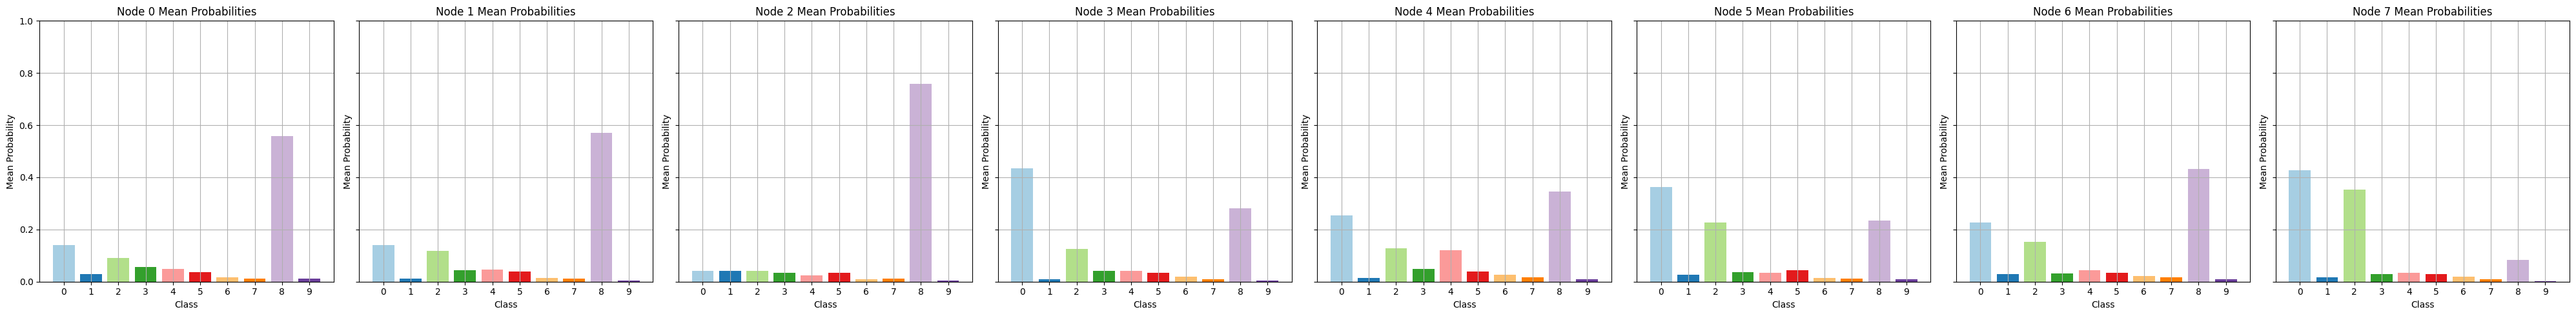

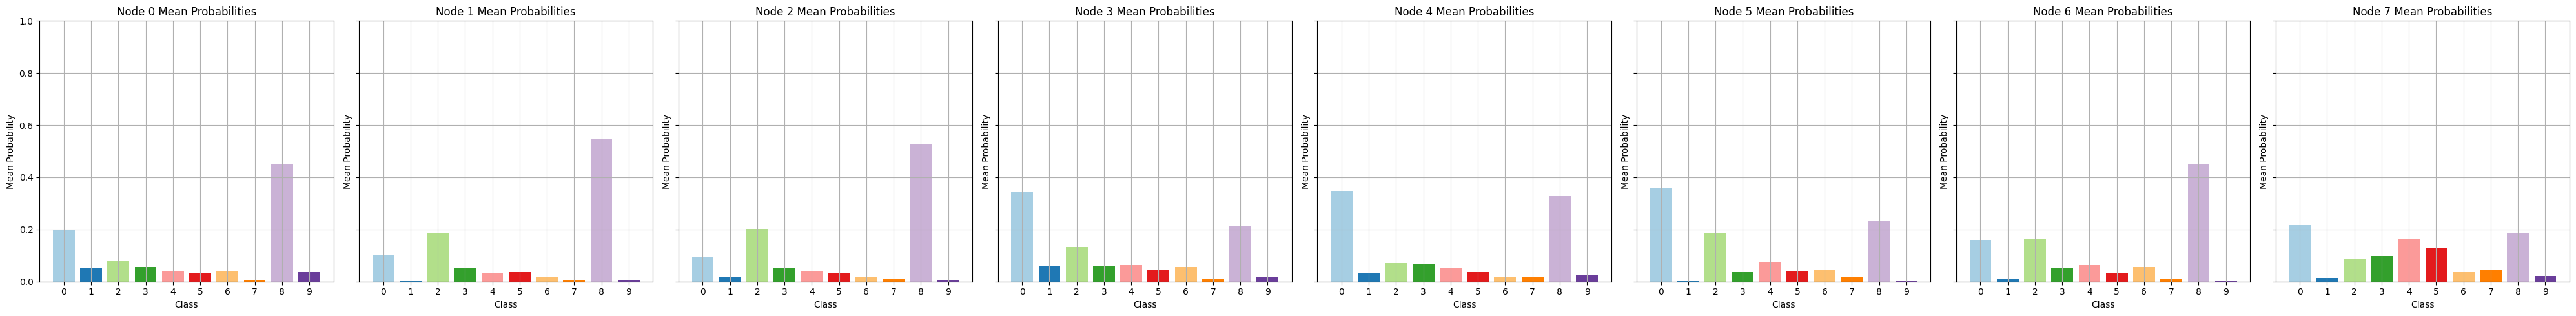

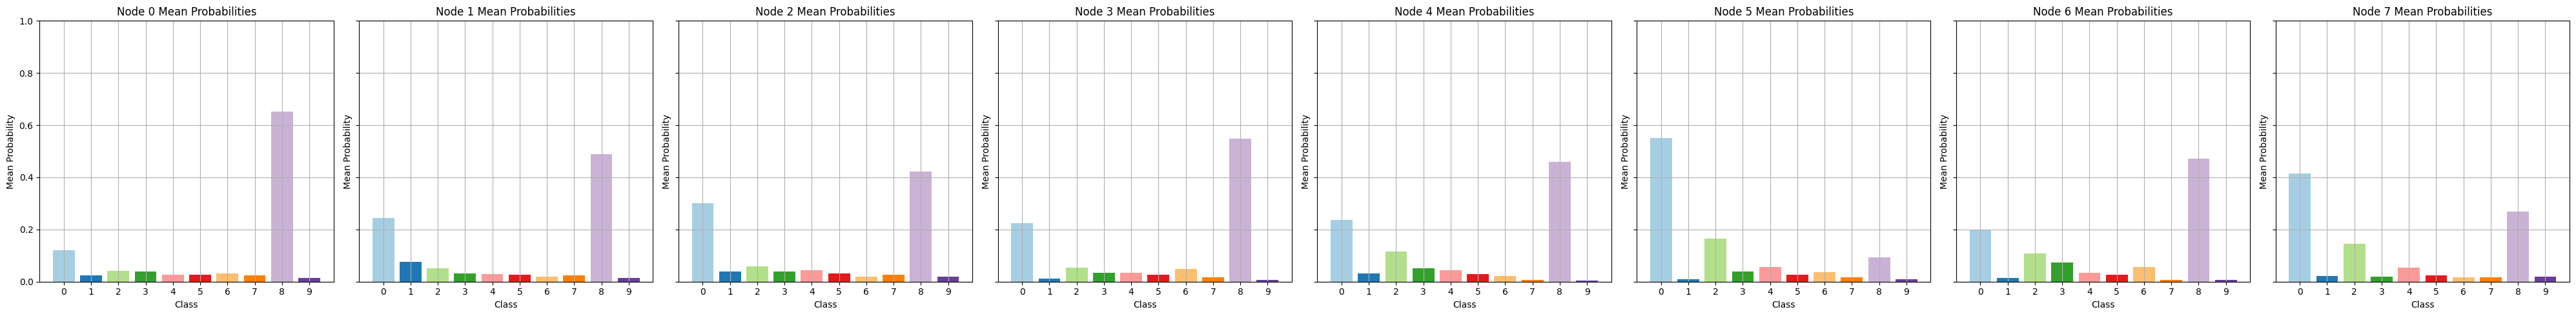

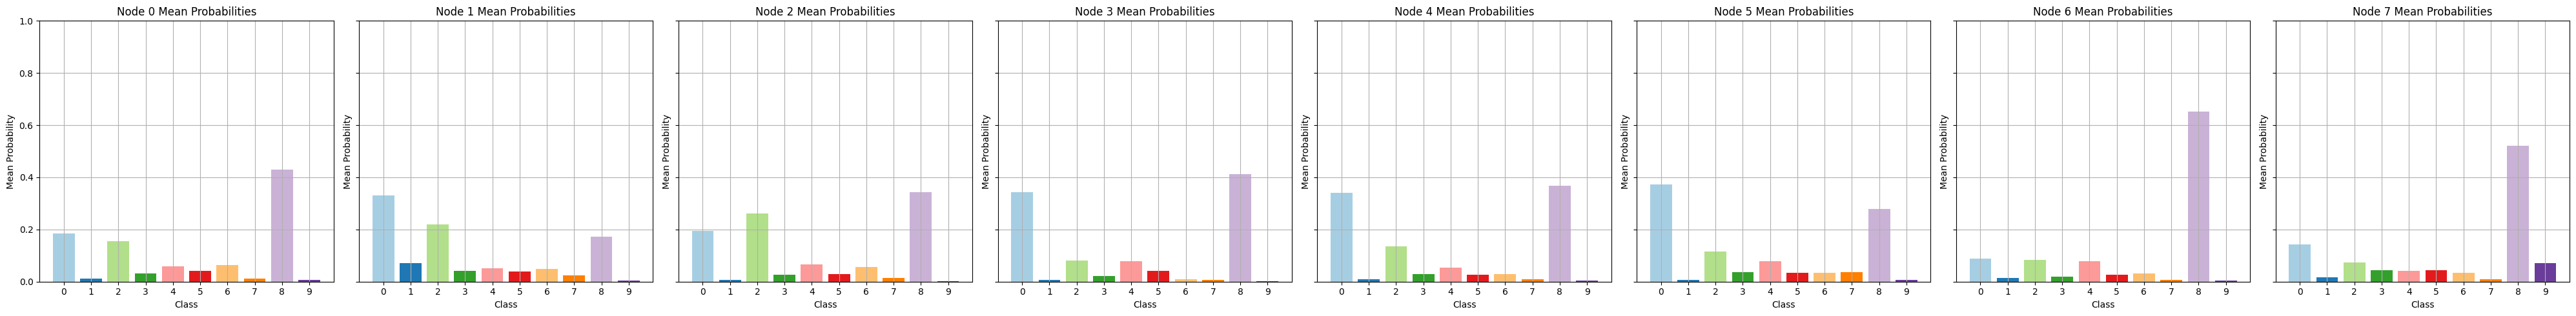

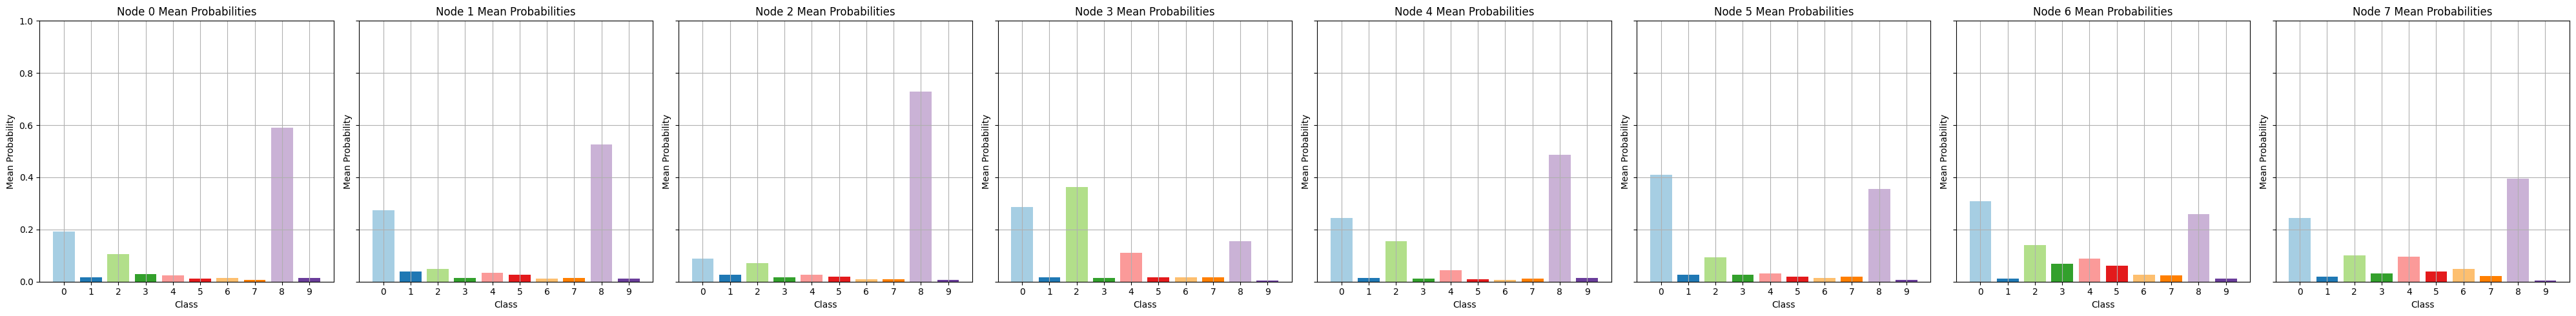

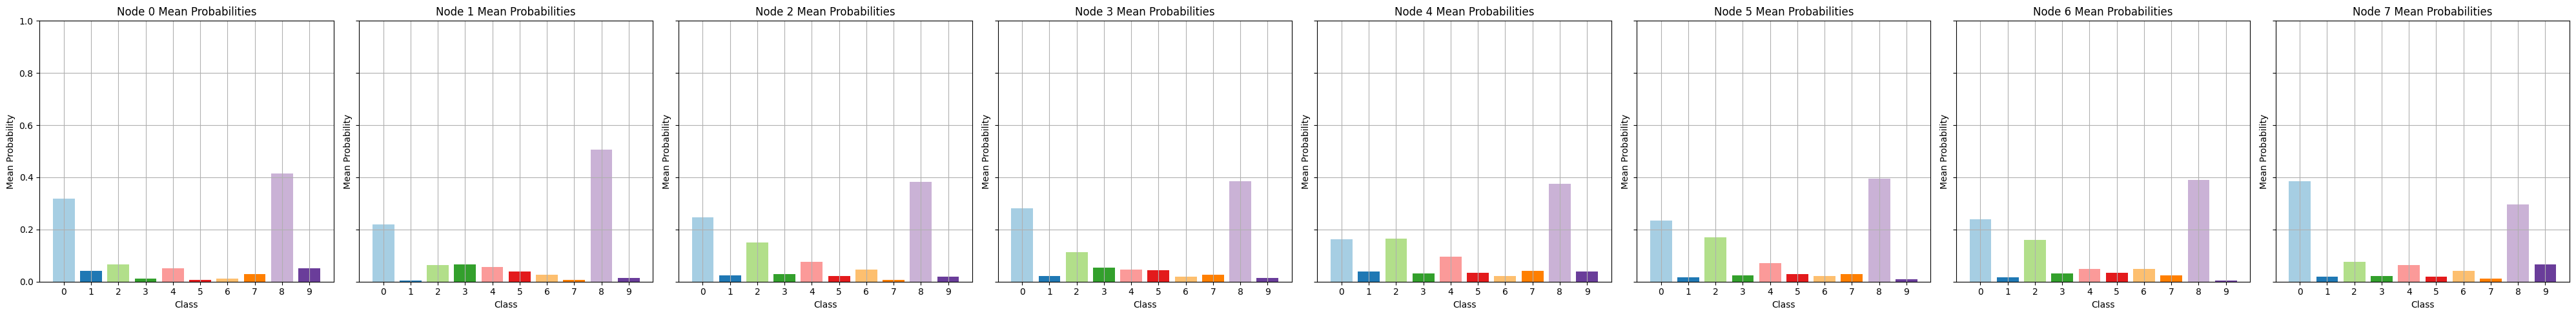

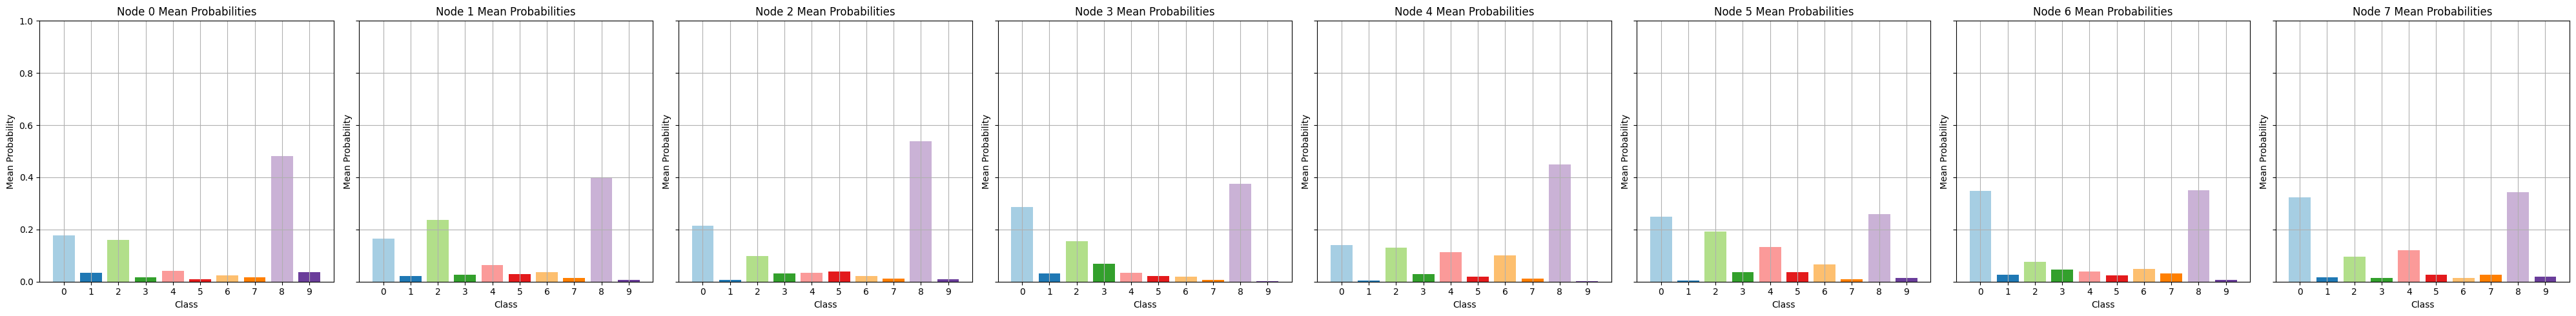

In [33]:
for i in range(10):
    plot_mean_prob_bar_in_one_epoch(node_stats, i)